# Atmospheric River Anomaly Composites

The last step in AR calculations. Just some code to play with the units and intervals in the composites.

* Input: `/glade/work/mkorendy/metisregimes/resolution/data.AR.10%.PNA.months.k5.anom_composite.nc`

1. Scale the metis resolutions by the number of ensembles

* Output: `/glade/work/mkorendy/metisregimes/resolution/data.AR.10%.PNA.months.k5.composite.png`

## Constants

In [139]:
res = '639'
era5 = True

threshold = '10%'

months = 'ND'

k = 5

## Imports

In [140]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

## Files

In [141]:
# Path
if res == '199' or era5 == True:
    path = '/glade/work/mkorendy/metisregimes/'
else:
    path = '/glade/work/mkorendy/metisregimes/tco' + res + '/'
    
# Input and output
if era5 == False:
    
    # Metis composite input
    f_comp = path + 'metis' + res + '.AR.' + threshold + '.PNA.' + months + '.k5.composite.nc'
    
    # Picture output
    f_pic = 'metis' + res + '.AR.' + threshold + '.PNA.' + months + '.k5.composite.png'

else:
    
    # ERA5 composite input
    f_comp = path + 'era5.AR.' + threshold + '.PNA.' + months + '.k5.composite.nc'
    
    # Picture output
    f_pic = 'era5.AR.' + threshold + '.PNA.' + months + '.k5.composite.png'

In [142]:
print(f_comp)
print(f_pic)

/glade/work/mkorendy/metisregimes/era5.AR.10%.PNA.ND.k5.composite.nc
era5.AR.10%.PNA.ND.k5.composite.png


## Read in the data

In [143]:
ds = xr.open_dataset(f_comp)

In [144]:
max(ds.river_anoms.values.flatten())

7.511092377452067

### Scale the metis data by the number of ensembles

In [145]:
if era5 == False and months == 'NDJFM':
    ds = ds/25
elif era5 == False and months == 'ND':
    ds = ds/15
    print('hello there')

In [146]:
max(ds.river_tot.values.flatten())

14

## Generate the composite

In [147]:
# Set titles
if months == 'NDJFM':
    if era5 == False:
        if res == '199':
            titles = ['Pacific Trough', 'Pacific Wavetrain', 'Arctic High', 'Arctic Low', 'Alaskan Ridge']
        elif res == '639':
            titles = ['Pacific Trough', 'Arctic High', 'Pacific Wavetrain', 'Arctic Low', 'Alaskan Ridge']
    else:
        titles = ['Pacific Wavetrain', 'Arctic Low', 'Pacific Trough', 'Arctic High', 'Alaskan Ridge']
else:
    if era5 == True:
        titles = ['Alaskan Ridge', 'Arctic Low','Pacific Trough', 'Pacific Wavetrain','Arctic High']
    elif res == '199':
        titles = ['Hybrid Pacific Wavetrain/Pacific Trough', 'Alaskan Ridge/Arctic Low', 
              'Hybrid Pacific Wavetrain/Alaskan Ridge', 'Arctic High', 'Pacific Trough']
    elif res == '639':
        titles = ['Pacific Trough', 'Alaskan Ridge', 'Pacific Wavetrain', 'Arctic High', 'Arctic Low']
    else:
        titles = ['Pacific Trough', 'Hybrid Pacific Trough/Arctic Low',
                 'Hybrid Pacific Wavetrain/Alaskan Ridge', 'Arctic High', 'Hybrid Alaskan Ridge/Arctic Low']

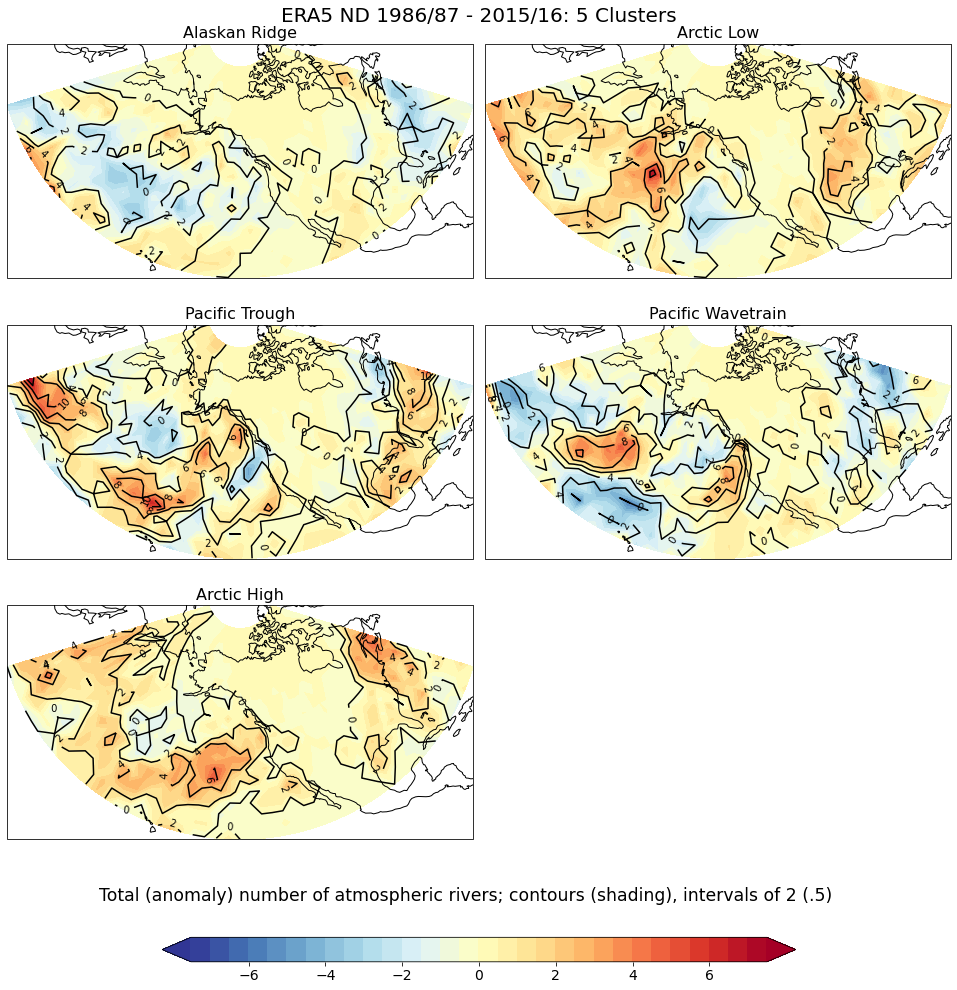

In [148]:
#Plot the figure

cm = 225
minlon = -70 + cm
maxlon = 80 + cm

if era5 == False:
    if months == 'NDJFM':
        clevs=np.arange(-22,24,2)
        levs=np.arange(0,40,5)
    else:
        clevs=np.arange(-7.5,8,.5)
        levs=np.arange(0,18,1)
else:
    if months == 'NDJFM':
        clevs = np.arange(-22,24,2)
        levs = np.arange(0,40,5)
    else:
        clevs = np.arange(-7.5,8,.5)
        levs = np.arange(0,18,2)
#clevs=[-12,-10,-9,-6,-3,0,3,6,9,10,12]
data_crs = ccrs.PlateCarree(central_longitude=cm)
proj = ccrs.NorthPolarStereo(central_longitude=cm)
#proj = ccrs.PlateCarree(central_longitude=cm)
fig,axs=plt.subplots(3,2,subplot_kw={'projection':proj},figsize=(22,17))

for i,ax in enumerate(axs.flatten()):
    #ax.set_extent(extent)
    if (i < 5):
        cs=ax.contourf(ds['lon'],ds['lat'],
                       ds.river_anoms[i] + 1e-100,clevs,
                       transform=ccrs.PlateCarree(),
                       cmap='RdYlBu_r', extend='both')
        cs2=ax.contour(ds['lon'],ds['lat'],
                   ds.river_tot[i],levs,colors='k',
                   transform=ccrs.PlateCarree())
        ax.clabel(cs2,fmt='%2d')
        ax.set_title(titles[i],fontdict={'fontsize':16})
        #ax.gridlines()
        ax.coastlines()
fig.delaxes(axs.flatten()[5])

if era5 == True:
    plt.suptitle('ERA5 ' + months + ' 1986/87 - 2015/16: ' + str(k) +' Clusters',fontsize=20)
else: 
    plt.suptitle('Metis' + res + ' ' + months + ' 1986/87 - 2015/16: Atmospheric Rivers for '
                  + str(k) + ' Clusters',fontsize=20)

# Add Colorbar
fig.subplots_adjust(bottom=0.3, top=0.95, left=0.2, right=0.8,
                    wspace=0.01, hspace=0.2)
cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 

if era5 == False:
    if months == 'NDJFM':
        plt.figtext(.22,.25,'Total (anomaly) number of atmospheric rivers scaled '
                    + 'by ensemble; contours (shading), intervals of 5 (2)',
                    fontsize='xx-large')
    else:
        plt.figtext(.22,.25,'Total (anomaly) number of atmospheric rivers scaled '
                    + 'by ensemble; contours (shading), intervals of 1 (.5)',
                fontsize='xx-large')
else:
    if months == 'NDJFM':
        plt.figtext(.26,.25,'Total (anomaly) number of atmospheric rivers; contours (shading), intervals of 5 (2)',
                fontsize='xx-large')
    else:
        plt.figtext(.26,.25,'Total (anomaly) number of atmospheric rivers; contours (shading), intervals of 2 (.5)',
                fontsize='xx-large')
plt.savefig(f_pic)